In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("train.csv", index_col='Id')
test = pd.read_csv("test.csv", index_col='Id')

# Checking Dependent variable features


In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


('Skew is:', 1.8828757597682129)
Kurtosis: 6.536282


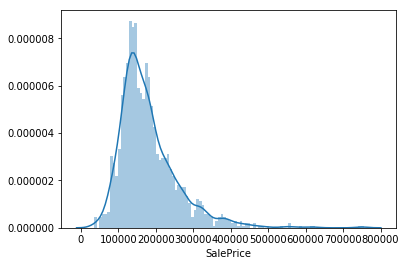

In [5]:
sns.distplot(train['SalePrice'],bins=100,hist=True)
print("Skew is:", train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

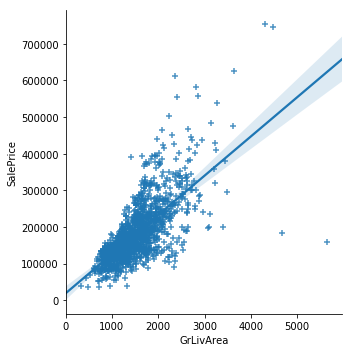

In [6]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train,markers='+')

In [23]:
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
output_notebook()
#sample = train
source = ColumnDataSource(train)
p = figure()
p.circle(x='GrLivArea', y='SalePrice', 
         source=source, 
         size=10, color='green')
#p.title.text = 'Greater Living Area'
p.xaxis.axis_label = 'Greater Living area'
p.yaxis.axis_label = 'Sale price'

hover = HoverTool()
hover.tooltips=[
    ('Sale Condition', '@SaleCondition'),
    ('Lot Area', '@LotArea')
]

p.add_tools(hover)

show(p)

Loading BokehJS ...

In [46]:
grouped = train.groupby('BldgType')['GrLivArea', 'LotArea', 'SalePrice'].mean()
print grouped
#grouped = np.log(grouped)
source = ColumnDataSource(grouped)
BldgType = source.data['BldgType'].tolist()
p = figure(x_range=BldgType)

            GrLivArea       LotArea      SalePrice
BldgType                                          
1Fam      1539.492623  11240.634426  185763.807377
2fmCon    1561.451613  15785.064516  128432.258065
Duplex    1567.307692   9720.057692  133541.076923
Twnhs     1276.418605   2391.209302  135911.627907
TwnhsE    1312.324561   4766.605263  181959.342105


In [54]:
from bokeh.palettes import Spectral6
#from bokeh.palettes import Category20
from bokeh.palettes import GnBu3, OrRd3

from bokeh.transform import factor_cmap

color_map = factor_cmap(field_name='BldgType', 
                   palette=['firebrick', 'olive', 'navy'], factors=salecond)

p.vbar(x='BldgType', top='SalePrice', source=source, width=0.70, color=color_map)

p.title.text ='BldgTypen and its primary attributes '

p.xaxis.axis_label = 'Building Type'
p.yaxis.axis_label = 'Sale Attributes'

hover = HoverTool()
hover.tooltips = [
    ("Totals", "@GrLivArea Greater Living Area/ @LotArea Lot Area / @SalePrice Sale Price")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

In [7]:
#train[train.SalePrice > 700000]

In [8]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['LotArea']>150000) & (train['SalePrice']<400000)].index)
#train = train.drop(train[(train['SalePrice']>700000)].index)

In [9]:
#Converting SalePrice to log value for better skewness
train['SalePrice'] = np.log1p(train.SalePrice)
#sns.distplot(train['log_SalePrice'],bins=20,hist=True)
#print("Skew is:", train.log_SalePrice.skew())
#print("Kurtosis: %f" % train.log_SalePrice.kurt())

In [10]:
#Checking Numerical features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [11]:
#Correlation on the Numerical features & Correlation
#numeric_features.drop("SalePrice", axis = 1, inplace = True)
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])

(SalePrice       1.000000
OverallQual     0.823084
GrLivArea       0.724695
GarageCars      0.681712
GarageArea      0.657553
TotalBsmtSF     0.645891
1stFlrSF        0.618853
FullBath        0.595355
YearBuilt       0.589170
YearRemodAdd    0.568770
Name: SalePrice, dtype: float64, '\n')
3SsnPorch        0.055364
BsmtFinSF2      -0.001923
BsmtHalfBath    -0.008165
MiscVal         -0.021482
OverallCond     -0.037534
LowQualFinSF    -0.037696
YrSold          -0.038030
MSSubClass      -0.074768
KitchenAbvGr    -0.147268
EnclosedPorch   -0.148362
Name: SalePrice, dtype: float64


OverallQual   GarageCars      0.601066
              SalePrice       0.823084
YearBuilt     GarageYrBlt     0.825303
YearRemodAdd  GarageYrBlt     0.642421
BsmtFinSF1    BsmtFullBath    0.657053
TotalBsmtSF   1stFlrSF        0.802750
              SalePrice       0.645891
1stFlrSF      TotalBsmtSF     0.802750
              SalePrice       0.618853
2ndFlrSF      GrLivArea       0.695747
              HalfBath        0.609294
              TotRmsAbvGrd    0.614979
GrLivArea     2ndFlrSF        0.695747
              FullBath        0.637892
              TotRmsAbvGrd    0.829598
              SalePrice       0.724695
BsmtFullBath  BsmtFinSF1      0.657053
FullBath      GrLivArea       0.637892
HalfBath      2ndFlrSF        0.609294
BedroomAbvGr  TotRmsAbvGrd    0.680667
TotRmsAbvGrd  2ndFlrSF        0.614979
              GrLivArea       0.829598
              BedroomAbvGr    0.680667
GarageYrBlt   YearBuilt       0.825303
              YearRemodAdd    0.642421
GarageCars    OverallQual

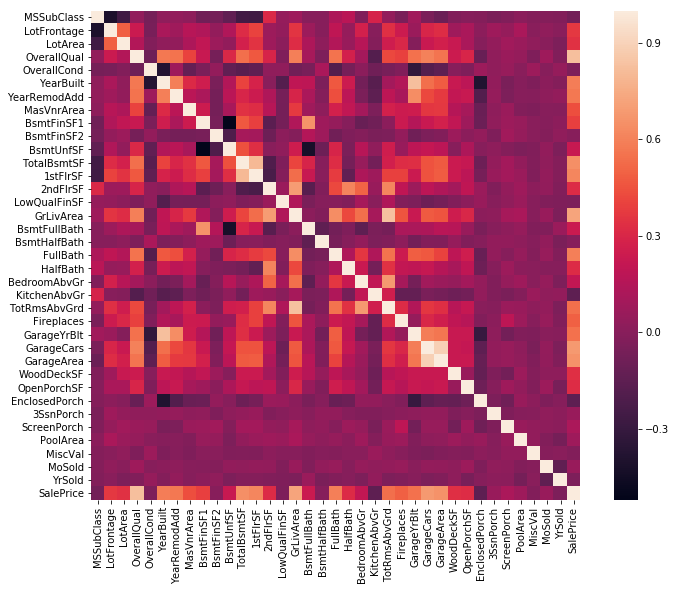

In [12]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True)
s = corr.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]


In [13]:
#Checking Null values
null_features = train.isnull().sum()
null_features[null_features.values > 0]

LotFrontage      257
Alley           1364
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1449
Fence           1174
MiscFeature     1403
dtype: int64

In [14]:
#CATEGORICAL PREDICTORS
categorical_predictors = train.select_dtypes(include=[np.object])
categorical_predictors.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [15]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = False, sort = False)
print(train.shape, test.shape, data.shape)

((1455, 81), (1459, 80), (2914, 81))


In [16]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699,train
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016,train
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171,train
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405,train
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220,train


In [17]:
#dealing with outliers. Kaggle demands that the final submission has all the houses
#GrLivArea_mean = data['GrLivArea'].mean()
#func = lambda x: x['GrLivArea'] > 4000 and GrLivArea_mean or x['GrLivArea']
#data['GrLivArea'] = data.apply(func,axis=1).astype(float)

#LotArea_mean = data['LotArea'].mean()
#func = lambda x: x['LotArea'] > 50000 and LotArea_mean or x['LotArea']
#data['LotArea'] = data.apply(func,axis=1).astype(float)

#Feature Engineering
data['Remodeled'] = data['YearRemodAdd'] - data['YearBuilt']
func = lambda x: x['Remodeled'] > 0 and 1.0 or 0.0
data['Remodeled'] = data.apply(func,axis=1).astype(float)

data['NewHouse'] = data['YrSold'] - data['YearBuilt']
func = lambda x: x['NewHouse'] == 0 and 1.0 or 0.0
data['NewHouse'] = data.apply(func,axis=1).astype(float)

#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(float)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(float)

#Year and month sold are transformed into categorical features.
data['MoSold'] = data['MoSold'].astype(float)


In [18]:
imputing_none = data[['Alley','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1', 'BsmtFinType2','FireplaceQu',
                      'GarageType','GarageFinish', 'GarageQual', 'GarageCond','PoolQC','Fence','MiscFeature']]
#for i in list(imputing_none.columns.values):
#    print("\n")
#    print("Analysing the " + i)
#    print(imputing_none[i].value_counts())
data.update(imputing_none.fillna("None"))

In [19]:
imputing_zero = data[['BsmtFullBath','BsmtHalfBath', 'TotalBsmtSF',
                      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','GarageArea','GarageCars','GarageYrBlt']]
#for i in list(imputing_zero.columns.values):
#    print("")
#    print("Analysing the " + i) 
#    print(imputing_zero[i].value_counts())
data.update(imputing_zero.fillna(0.0))


In [20]:
#data.update(data['GarageYrBlt'].fillna(data.YearBuilt))

In [21]:
catfeats_fillnamode = ['Electrical', 'MasVnrType', 'MSZoning', 'Functional', 
                       'Utilities','Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
data.loc[:, catfeats_fillnamode] = data[catfeats_fillnamode].fillna(data[catfeats_fillnamode].mode().iloc[0])

In [22]:
Type_median_Area = data.pivot_table(index ="MasVnrType", values ="MasVnrArea" , aggfunc = "median")
def impute_median_neigh(cols):
    Mas_Vnr_Area = cols[0]
    Mas_Vnr_Type = cols[1]
    
    if pd.isnull(Mas_Vnr_Area):
        return Type_median_Area["MasVnrArea"][Type_median_Area.index == Mas_Vnr_Type]
    else:
        return Mas_Vnr_Area
print('Original #missing: %d'%sum(data["MasVnrArea"].isnull()))
data["MasVnrArea"] = data[["MasVnrArea","MasVnrType"]].apply(impute_median_neigh,axis=1).astype(float)
print('Final #missing: %d'%sum(data["MasVnrArea"].isnull()))

Original #missing: 23
Final #missing: 0


In [23]:
neigh_median_lot = train.pivot_table(index ="Neighborhood", 
                                      values ="LotFrontage" , 
                                      aggfunc = "median")

def impute_median_neigh(cols):
    LotFrontage = cols[0]
    Neighborhood = cols[1]
    
    if pd.isnull(LotFrontage):
        return neigh_median_lot["LotFrontage"][neigh_median_lot.index == Neighborhood]
    else:
        return LotFrontage

data["LotFrontage"] = data[["LotFrontage","Neighborhood"]].apply(impute_median_neigh,axis=1).astype(float)


In [24]:
data['OverallSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']

In [25]:
null_features = data.isnull().sum()
null_features[null_features.values > 0]

SalePrice    1459
dtype: int64

In [26]:
numeric_feats = data.dtypes[data.dtypes != "object"].index
numeric_feats = numeric_feats.tolist()
#data[numeric_feats]


In [27]:
#log transform skewed numeric features:
#numeric_feats = data.dtypes[data.dtypes != "object"].index
#$skewed_feats = data[numeric_feats].apply(lambda x: x.skew()) #compute skewness
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index
#data[skewed_feats] = np.log1p(data[skewed_feats])

In [28]:
#skewed_feats

In [29]:
#Treating non niumeric
data.select_dtypes(include = [object]).columns

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition', u'source'],
      dtype='object')

In [30]:
#Replacing numeric values for ordinal variables
#data.LotShape = data.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
#data.Utilities = data.Utilities.replace({'AllPub':0, 'NoSeWa':1})
#data.LandSlope = data.LandSlope.replace({'Gtl':0, 'Mod':1, 'Sev':2})
#data.ExterQual = data.ExterQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
#data.ExterCond = data.ExterCond.replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
#data.BsmtQual = data.BsmtQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'None':3,'Fa':4})
#data.BsmtCond = data.BsmtCond.replace({'TA':0, 'Gd':1, 'None':2, 'Fa':3,'Po':4})
#data.BsmtExposure = data.BsmtExposure.replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'None':4})
#data.BsmtFinType1 = data.BsmtFinType1.replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'None':5, 'LwQ':6})
#data.BsmtFinType2 = data.BsmtFinType2.replace({'Unf':0, 'BLQ':1, 'None':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
#data.HeatingQC = data.HeatingQC.replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
#data.Electrical = data.Electrical.replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
#data.KitchenQual = data.KitchenQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
#data.Functional = data.Functional.replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6})
#data.FireplaceQu = data.FireplaceQu.replace({'None':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
#data.GarageFinish = data.GarageFinish.replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3})
#data.GarageQual = data.GarageQual.replace({'TA':0, 'Fa':1, 'Gd':2, 'None':3, 'Ex':4, 'Po':5})
#data.GarageCond = data.GarageCond.replace({'TA':0, 'Fa':1, 'None':2, 'Gd':3, 'Po':4, 'Ex':5})
#data.PavedDrive = data.PavedDrive.replace({'Y':0, 'N':1, 'P':2})
#data.PoolQC = data.PoolQC.replace({'None':0, 'Ex':1, 'Fa':2, 'Gd':3})
#data.Fence = data.Fence.replace({'None':0, 'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'MnWw':4})

In [31]:
#Common values
#data.Heating = data.Heating.replace({'GasW':"Others", 'Grav':"Others", 'Wall':"Others", 'OthW':"Others", 'Floor':"Others"})
#data.Condition1 = data.Condition1.replace({'RRAn':"Others", 'PosN':"Others", 'RRAe':"Others", 'PosA':"Others", 'RRNn':"Others",'RRNe':"Others"})

In [32]:
#Label Encoders (Dummy trap)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["MSZoning", "Street", "Alley" ,"LandContour" ,"LotConfig", "Neighborhood", 
           "Condition1" ,"Condition2", "BldgType","HouseStyle" ,"RoofStyle", "RoofMatl" ,
           "Exterior1st" ,"Exterior2nd", "MasVnrType", "Foundation" ,"Heating","CentralAir", 
           "GarageType" ,"MiscFeature" ,"SaleType" ,"SaleCondition",
          "LotShape","Utilities","LandSlope","ExterQual","ExterCond","BsmtQual","BsmtCond",
           "BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual",
          "Functional", "FireplaceQu","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence"
          ]
#for i in var_mod:
#    data[i] = le.fit_transform(data[i])
#Dummy Variables:
data = pd.get_dummies(data, columns = var_mod)
#data.dtypes

In [33]:
#data['OverallSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']


In [34]:
# drop multi collinear predictors, and features used for feature engineering
#data.drop(['GarageArea','1stFlrSF','YearRemodAdd','YearBuilt','YrSold','TotRmsAbvGrd'],axis =1, inplace = True)

In [35]:
fcorr = data.corr()
print(fcorr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print(fcorr['SalePrice'].sort_values(ascending=False)[-10:])

(SalePrice      1.000000
OverallSF      0.824530
OverallQual    0.823084
GrLivArea      0.724695
GarageCars     0.681712
GarageArea     0.657553
TotalBsmtSF    0.645891
1stFlrSF       0.618853
FullBath       0.595355
YearBuilt      0.589170
Name: SalePrice, dtype: float64, '\n')
Foundation_CBlock   -0.342323
MSZoning_RM         -0.347095
CentralAir_N        -0.351649
GarageType_Detchd   -0.387983
MasVnrType_None     -0.389850
GarageFinish_Unf    -0.431032
BsmtQual_TA         -0.477883
FireplaceQu_None    -0.509171
KitchenQual_TA      -0.541300
ExterQual_TA        -0.598723
Name: SalePrice, dtype: float64


In [36]:
#s = fcorr.unstack()
#d = s[(abs(s)>0.75) & (abs(s) < 1)]
#cols_to_drop = list(d.reset_index().level_1)

In [37]:
#cols_to_drop = list(set(cols_to_drop)-set(['SalePrice']))

In [38]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test.drop(['SalePrice','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=True)
test.to_csv("test_modified.csv",index=True)